In [1]:
# Loading the necessary libraries
# This script is designed to load and visualize data using pandas, numpy, matplotlib, and seaborn.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the data set
df = pd.read_csv("D:\\datasets\\food_price_indices_data_jun25.csv")
df = df[df.columns[:7]]

In [3]:
# ✅ STEP 3: Preview the Dataset
print("\n--- Dataset Head ---")
print(df.head())
print("\n--- Dataset Info ---")
df.info()
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Dataset Head ---
      Date  Food Price Index  Meat  Dairy  Cereals   Oils  Sugar
0  1990-01              64.4  74.3   53.5     64.1  44.59   87.9
1  1990-02              64.7  76.8   52.2     62.2  44.50   90.7
2  1990-03              64.0  78.5   41.4     61.3  45.75   95.1
3  1990-04              66.0  81.2   48.4     62.8  44.02   94.3
4  1990-05              64.6  81.8   39.2     62.0  45.50   90.4

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              425 non-null    object 
 1   Food Price Index  425 non-null    float64
 2   Meat              425 non-null    float64
 3   Dairy             425 non-null    float64
 4   Cereals           425 non-null    float64
 5   Oils              425 non-null    float64
 6   Sugar             425 non-null    float64
dtypes: float64(6), object(1)
memory us

In [ ]:
# ✅ STEP 4: Convert 'Date' Column to DateTime
df['Date'] = pd.to_datetime(df['Date'],)
df = df.sort_values('Date')
print(df.head())


        Date  Food Price Index  Meat  Dairy  Cereals   Oils  Sugar
0 1990-01-01              64.4  74.3   53.5     64.1  44.59   87.9
1 1990-02-01              64.7  76.8   52.2     62.2  44.50   90.7
2 1990-03-01              64.0  78.5   41.4     61.3  45.75   95.1
3 1990-04-01              66.0  81.2   48.4     62.8  44.02   94.3
4 1990-05-01              64.6  81.8   39.2     62.0  45.50   90.4


In [36]:
# ✅ STEP 5: Set Date as Index (for time series analysis)
df.set_index('Date',inplace = True)
# Save the modified DataFrame to a new CSV file
df.to_csv("D:\\datasets\\food_price_indices_data_jun25_modified.csv")

KeyError: "None of ['Date'] are in the columns"

In [6]:
print(df.head())

            Food Price Index  Meat  Dairy  Cereals   Oils  Sugar
Date                                                            
1990-01-01              64.4  74.3   53.5     64.1  44.59   87.9
1990-02-01              64.7  76.8   52.2     62.2  44.50   90.7
1990-03-01              64.0  78.5   41.4     61.3  45.75   95.1
1990-04-01              66.0  81.2   48.4     62.8  44.02   94.3
1990-05-01              64.6  81.8   39.2     62.0  45.50   90.4


In [7]:
#Moving to exploratory data analysis
# ✅ STEP 6: Summary Statistics
print("\n--- Summary Statistics ---")
print(df.describe())


--- Summary Statistics ---
       Food Price Index        Meat       Dairy     Cereals        Oils  \
count        425.000000  425.000000  425.000000  425.000000  425.000000   
mean          88.486118   86.820471   87.755059   89.360706   92.532329   
std           26.997864   17.995345   34.483049   31.795107   39.200218   
min           50.800000   52.300000   36.800000   48.600000   35.830000   
25%           64.600000   72.900000   56.900000   60.600000   63.670000   
50%           86.300000   84.500000   80.500000   87.600000   82.780000   
75%          114.700000  100.900000  115.400000  112.100000  118.380000   
max          160.200000  125.400000  158.200000  173.500000  251.800000   

            Sugar  
count  425.000000  
mean    84.705882  
std     32.946347  
min     31.800000  
25%     59.900000  
50%     77.800000  
75%    109.000000  
max    183.200000  


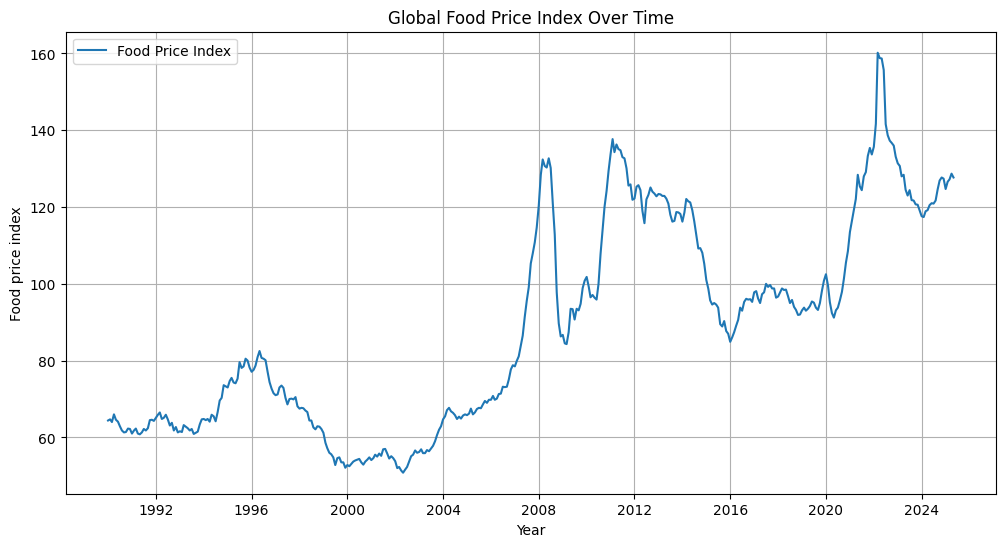

In [8]:
# ✅ STEP 7: Basic Line Plot
plt.figure(figsize = (12, 6))
plt.plot(df['Food Price Index'], label='Food Price Index')
plt.title("Global Food Price Index Over Time")
plt.xlabel("Year")
plt.ylabel("Food price index")
plt.legend()
plt.grid()
plt.show()


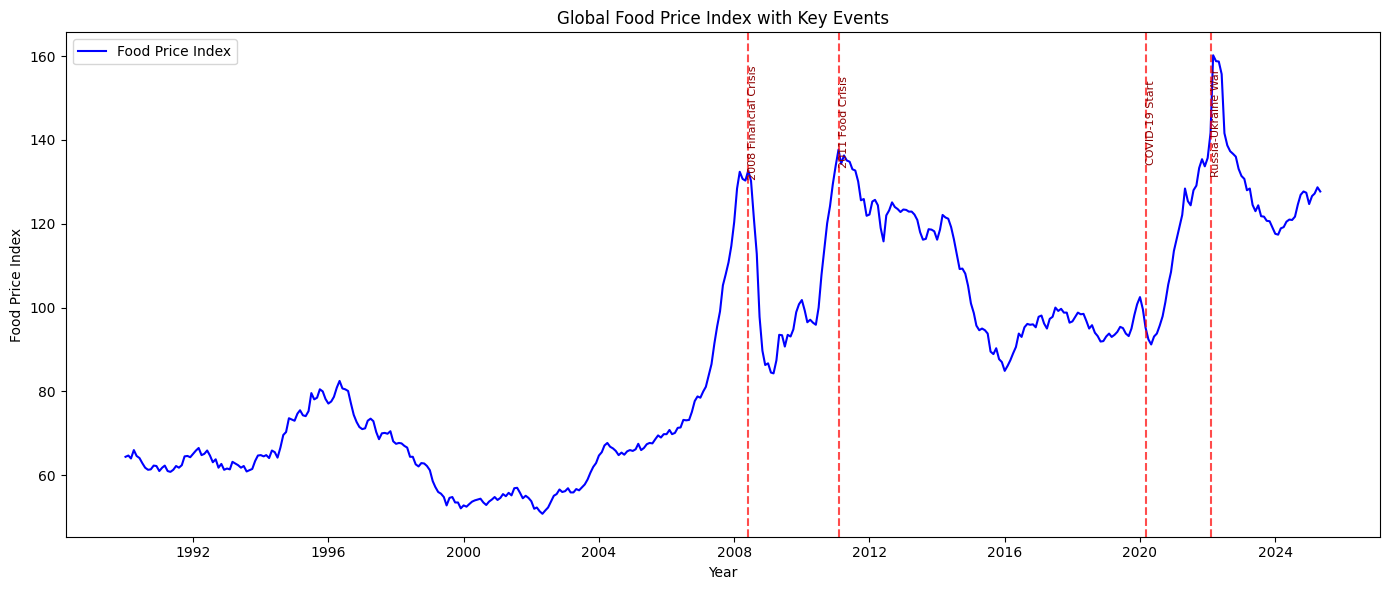

In [9]:
# Annotate key global events
event_dates = {
    '2008 Financial Crisis': '2008-06-01',
    '2011 Food Crisis': '2011-02-01',
    'COVID-19 Start': '2020-03-01',
    'Russia-Ukraine War': '2022-02-01'
}
plt.figure(figsize=(14,6))
plt.plot(df['Food Price Index'], label='Food Price Index', color='blue')
plt.title("Global Food Price Index with Key Events")
plt.xlabel("Year")
plt.ylabel("Food Price Index")
plt.legend()
#plot each event
for event, date in event_dates.items():
    plt.axvline(pd.to_datetime(date), color ='red', linestyle='--', alpha = 0.7)
    plt.text(
            pd.to_datetime(date),
             df['Food Price Index'].max()*0.9, 
             event, 
             rotation=90,
             verticalalignment = 'center',
             color='darkred',
             fontsize=8
             )
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
df.to_csv("global_food_prices.csv", index=True)


In [11]:
print(df.head())

            Food Price Index  Meat  Dairy  Cereals   Oils  Sugar
Date                                                            
1990-01-01              64.4  74.3   53.5     64.1  44.59   87.9
1990-02-01              64.7  76.8   52.2     62.2  44.50   90.7
1990-03-01              64.0  78.5   41.4     61.3  45.75   95.1
1990-04-01              66.0  81.2   48.4     62.8  44.02   94.3
1990-05-01              64.6  81.8   39.2     62.0  45.50   90.4


<Figure size 4000x2000 with 0 Axes>

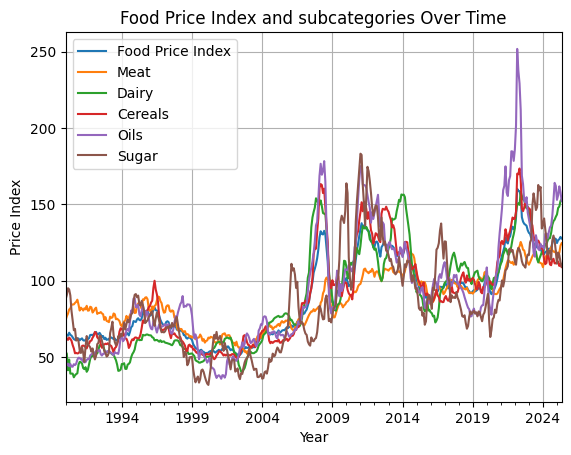

In [12]:
# plot trends
plt.figure(figsize=(40, 20))
df[['Food Price Index', 'Meat', 'Dairy', 'Cereals', 'Oils', 'Sugar']].plot()
plt.title("Food Price Index and subcategories Over Time")
plt.xlabel("Year")
plt.ylabel("Price Index")
plt.grid(True)
plt.show()


In [13]:
# ✅ STEP 8: Summary Statistics Again
print(df.describe())

       Food Price Index        Meat       Dairy     Cereals        Oils  \
count        425.000000  425.000000  425.000000  425.000000  425.000000   
mean          88.486118   86.820471   87.755059   89.360706   92.532329   
std           26.997864   17.995345   34.483049   31.795107   39.200218   
min           50.800000   52.300000   36.800000   48.600000   35.830000   
25%           64.600000   72.900000   56.900000   60.600000   63.670000   
50%           86.300000   84.500000   80.500000   87.600000   82.780000   
75%          114.700000  100.900000  115.400000  112.100000  118.380000   
max          160.200000  125.400000  158.200000  173.500000  251.800000   

            Sugar  
count  425.000000  
mean    84.705882  
std     32.946347  
min     31.800000  
25%     59.900000  
50%     77.800000  
75%    109.000000  
max    183.200000  


In [14]:
# ✅ STEP 8: Correlation 
print(df.corr())

                  Food Price Index      Meat     Dairy   Cereals      Oils  \
Food Price Index          1.000000  0.903674  0.936961  0.974745  0.947438   
Meat                      0.903674  1.000000  0.806880  0.829185  0.778405   
Dairy                     0.936961  0.806880  1.000000  0.906521  0.870531   
Cereals                   0.974745  0.829185  0.906521  1.000000  0.920118   
Oils                      0.947438  0.778405  0.870531  0.920118  1.000000   
Sugar                     0.813038  0.767991  0.685633  0.752321  0.731891   

                     Sugar  
Food Price Index  0.813038  
Meat              0.767991  
Dairy             0.685633  
Cereals           0.752321  
Oils              0.731891  
Sugar             1.000000  


C:\Users\USER\AppData\Local\Temp\ipykernel_8028\682761005.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_volatility = df.resample('Y').std()


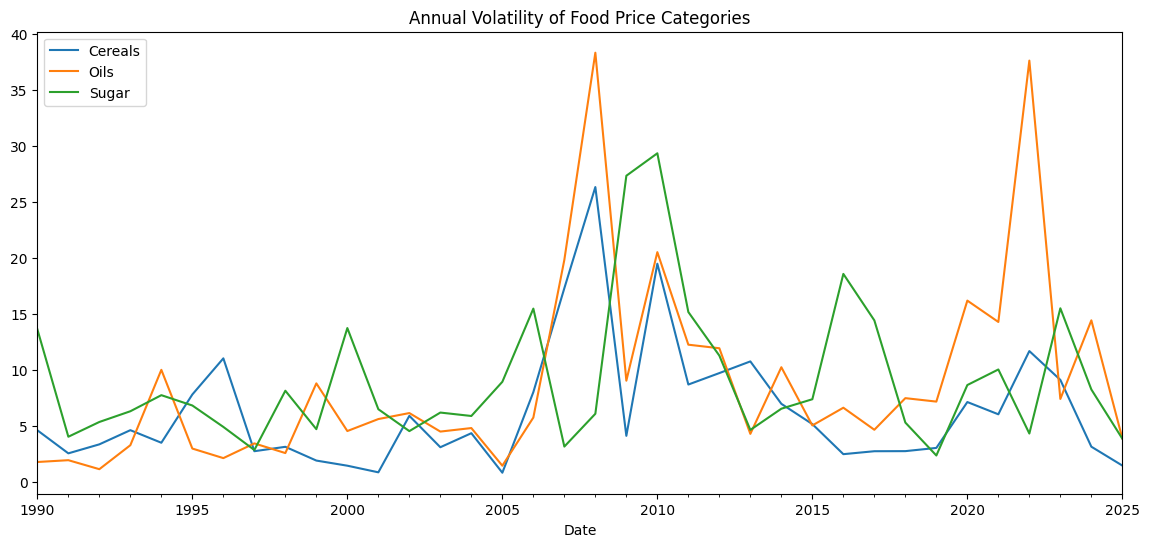

In [15]:
# Calculate annual volatility
annual_volatility = df.resample('Y').std()
# Plot annual volatility
annual_volatility[['Cereals','Oils','Sugar']].plot(figsize=(14,6))
plt.title("Annual Volatility of Food Price Categories")
plt.show()

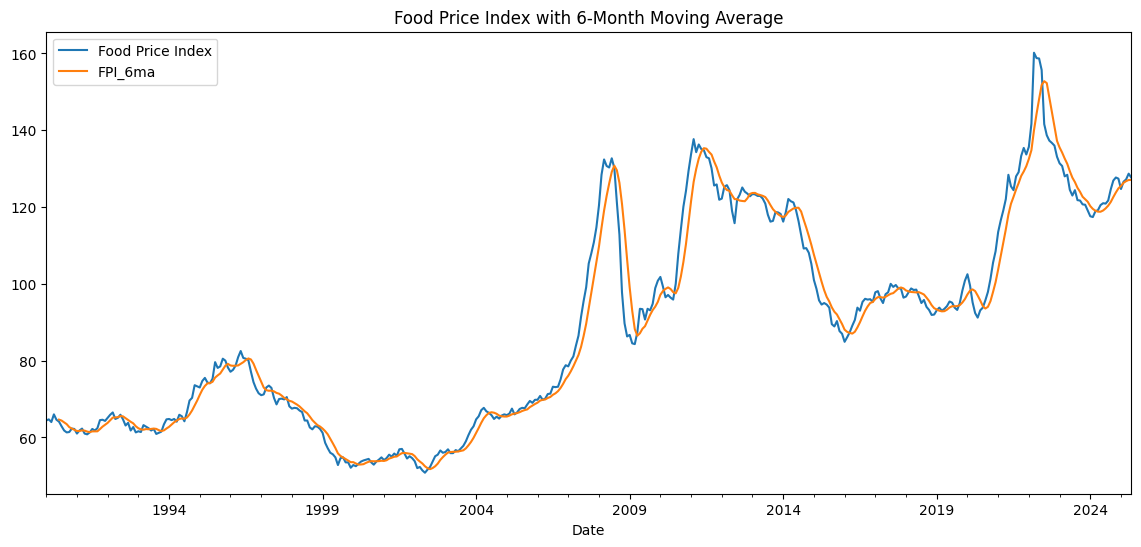

In [16]:
df['FPI_6ma'] = df['Food Price Index'].rolling(6).mean()
df[['Food Price Index', 'FPI_6ma']].plot(figsize=(14,6))
plt.title('Food Price Index with 6-Month Moving Average')
plt.show()

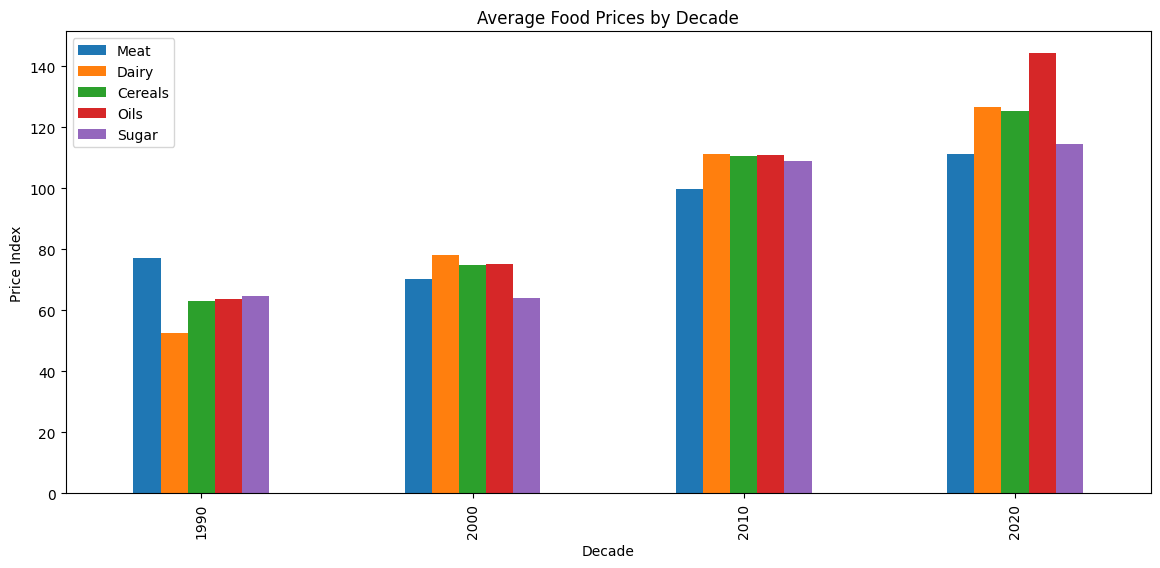

In [17]:
# Final visualization - Price Changes by Decade
df['Decade'] = (df.index.year//10)*10
decade_avg = df.groupby('Decade').mean()
decade_avg[['Meat', 'Dairy', 'Cereals', 'Oils', 'Sugar']].plot(kind='bar', figsize=(14,6))
plt.title('Average Food Prices by Decade')
plt.ylabel('Price Index')
plt.show()

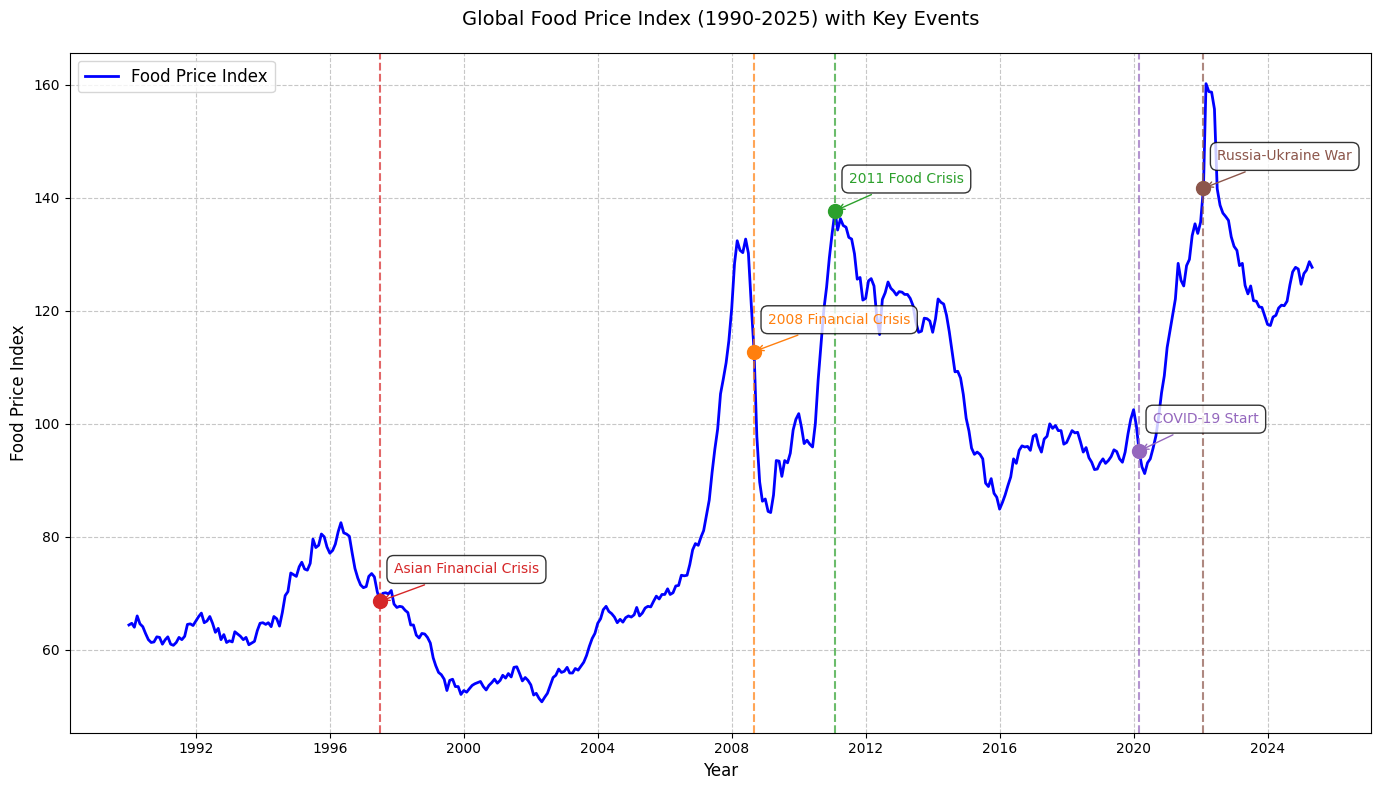

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
#better visualization of food price index with key events

# Create the plot with event annotations
plt.figure(figsize=(14, 8))

# Plot the Food Price Index
plt.plot(df.index, df['Food Price Index'], 
         label='Food Price Index', 
         color='blue', 
         linewidth=2)

# Customize the plot
plt.title("Global Food Price Index (1990-2025) with Key Events", 
          fontsize=14, pad=20)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Food Price Index", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Define and annotate key events
event_dates = {
    'Asian Financial Crisis': '1997-07-01',
    '2008 Financial Crisis': '2008-09-01',
    '2011 Food Crisis': '2011-02-01',
    'COVID-19 Start': '2020-03-01',
    'Russia-Ukraine War': '2022-02-01'
}

colors = ['#d62728', '#ff7f0e', '#2ca02c', '#9467bd', '#8c564b']

for i, (event, date) in enumerate(event_dates.items()):
    event_date = pd.to_datetime(date)
    event_value = df.loc[date, 'Food Price Index']
    
    # Add vertical line
    plt.axvline(event_date, 
                color=colors[i], 
                linestyle='--', 
                alpha=0.7, 
                linewidth=1.5)
    
    # Add event annotation
    plt.annotate(event,
                 xy=(event_date, event_value),
                 xytext=(10, 20), 
                 textcoords='offset points',
                 arrowprops=dict(arrowstyle='->', color=colors[i]),
                 bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8),
                 color=colors[i],
                 fontsize=10)
    
    # Add marker at event point
    plt.scatter(event_date, event_value, 
                color=colors[i], 
                s=100, 
                zorder=5)

# Add legend and adjust layout
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 3.3 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/9.8 MB 4.7 MB/s eta 0:00:02
   --------- ------------------------------ 2.4/9.8 MB 4.4 MB/s eta 0:00:02
   ---------- ----------------------------- 2.6/9.8 MB 3.6 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/9.8 MB 3.0 MB/s eta 0:00:03
   ----------- ---------------------------- 2.9/9.8 MB 3.0 MB/s eta 0:00:03
   ------------ --------------------------- 3.1/9.8 MB 2.2 MB/s eta 0:00:04
   ------------ --------------------------- 3.1/9.8 MB 2.2 MB/s eta 0:00:04
   ------------ --------------------------- 3.1/9.8 MB 2.2 MB/s eta 0:00:04
   ------------ --------------------------- 3.1/9.8 MB 2.2 MB/s eta 0:00:04
   ------------- -------------------------- 3.4/9.8 MB 1.5 MB/s eta 0:00:05
   ------------- -------------------------- 3.4/9.8 MB 1.5 MB/s eta 0:00:05
   ------------- --

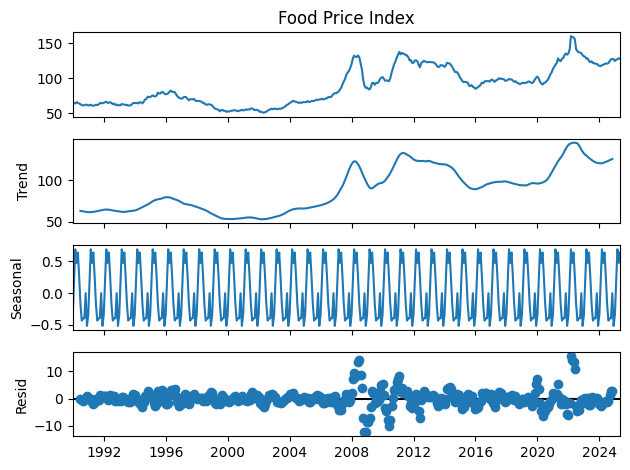

In [22]:
# Advanced time series analysis
# Decompose the time series

%pip install statsmodels

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Food Price Index'], model='additive')
decomposition.plot()
plt.show()

In [ ]:
# Test for stationarity, using the Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df['Food Price Index'])
print(f"ADF statistic: {adf_result[0]}, p-value: {adf_result[1]}")

ADF statistic: -1.7553750624530842, p-value: 0.40283079053828463


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Local\Temp\ipykernel_8028\4024771709.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=df.index[-1], periods=13, freq='M')[1:], forecast, label='Forecast', color='orange')


ValueError: x and y must have same first dimension, but have shapes (12,) and (48,)

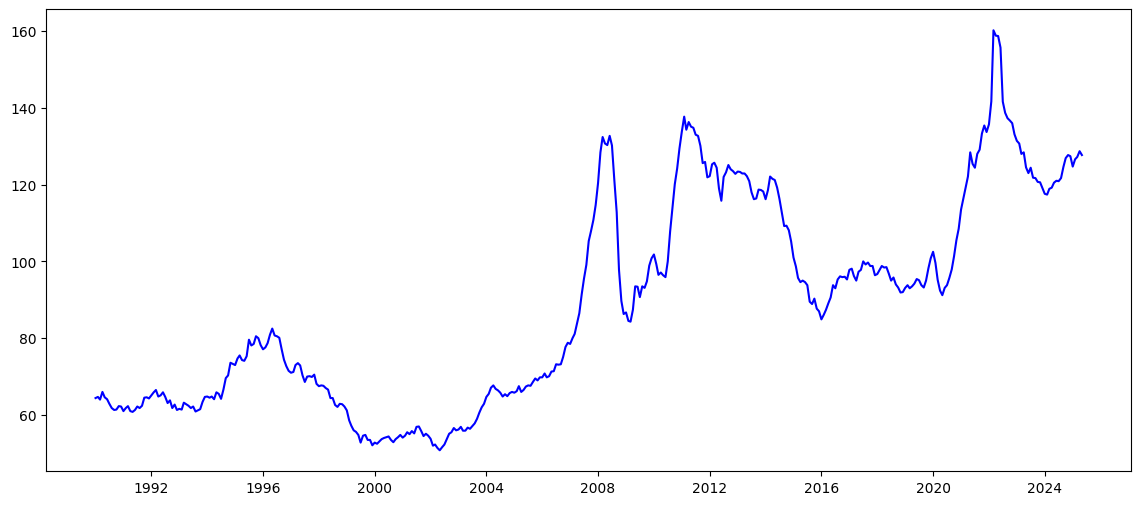

In [26]:
# Forcast prices using ARIMA model
from statsmodels.tsa.arima.model import ARIMA
# Fit ARIMA model
model = ARIMA(df['Food Price Index'])
model_fit = model.fit()
forecast = model_fit.forecast(steps=48) # Forecast for the next 4 years (48 months)
# Plot the forecast
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Food Price Index'], label='Historical Data', color='blue')
plt.plot(pd.date_range(start=df.index[-1], periods=13, freq='M')[1:], forecast, label='Forecast', color='orange')
plt.title('ARIMA Forecast of Food Price Index')
plt.xlabel('Year')
plt.ylabel('Food Price Index')
plt.legend()
plt.show()

In [35]:
# Causal impact analysis
%pip install causalimpact pystan --quiet

from causalimpact import CausalImpact

# Ensure the periods exist in the index and are pandas Timestamps
pre_period = [pd.Timestamp('2019-01-01'), pd.Timestamp('2022-01-01')]
post_period = [pd.Timestamp('2022-02-01'), pd.Timestamp('2023-12-01')]

# Subset the data to the relevant period (to avoid missing months)
start = pre_period[0]
end = post_period[1]
data = df.loc[start:end, ['Food Price Index']].copy()

# Drop missing values
data = data.dropna()

# Add a constant covariate (required by CausalImpact if you have only one time series)
data['constant'] = 1

# Check if periods are within the data index
print("Data index range:", data.index.min(), "to", data.index.max())
print("Pre-period:", pre_period)
print("Post-period:", post_period)

# Run CausalImpact
impact = CausalImpact(data, pre_period, post_period)
impact.plot()


Note: you may need to restart the kernel to use updated packages.
Data index range: 2019-01-01 00:00:00 to 2023-12-01 00:00:00
Pre-period: [Timestamp('2019-01-01 00:00:00'), Timestamp('2022-01-01 00:00:00')]
Post-period: [Timestamp('2022-02-01 00:00:00'), Timestamp('2023-12-01 00:00:00')]


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [23 lines of output]
      Traceback (most recent call last):
        File "c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 389, in <module>
          main()
          ~~~~^^
        File "c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 373, in main
          json_out["return_val"] = hook(**hook_input["kwargs"])
                                   ~~~~^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 143, in get_requires_for_build_wheel
          return hook(config_settings)
        File "C:\Users\USER\AppData\Local\Temp\pip-build-env-cvlr55q0\overlay\Lib\site-packages\

AttributeError: 'NoneType' object has no attribute 'iloc'

<Figure size 1500x1200 with 0 Axes>

In [37]:
# Save the modified DataFrame to a new CSV file
df.to_csv("D:\\datasets\\food_price_indices_data_jun25_modified.csv")